<a href="https://colab.research.google.com/github/abhinavbairy/Netflix_Content_Insights/blob/main/Netflix_Content_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix EDA Project

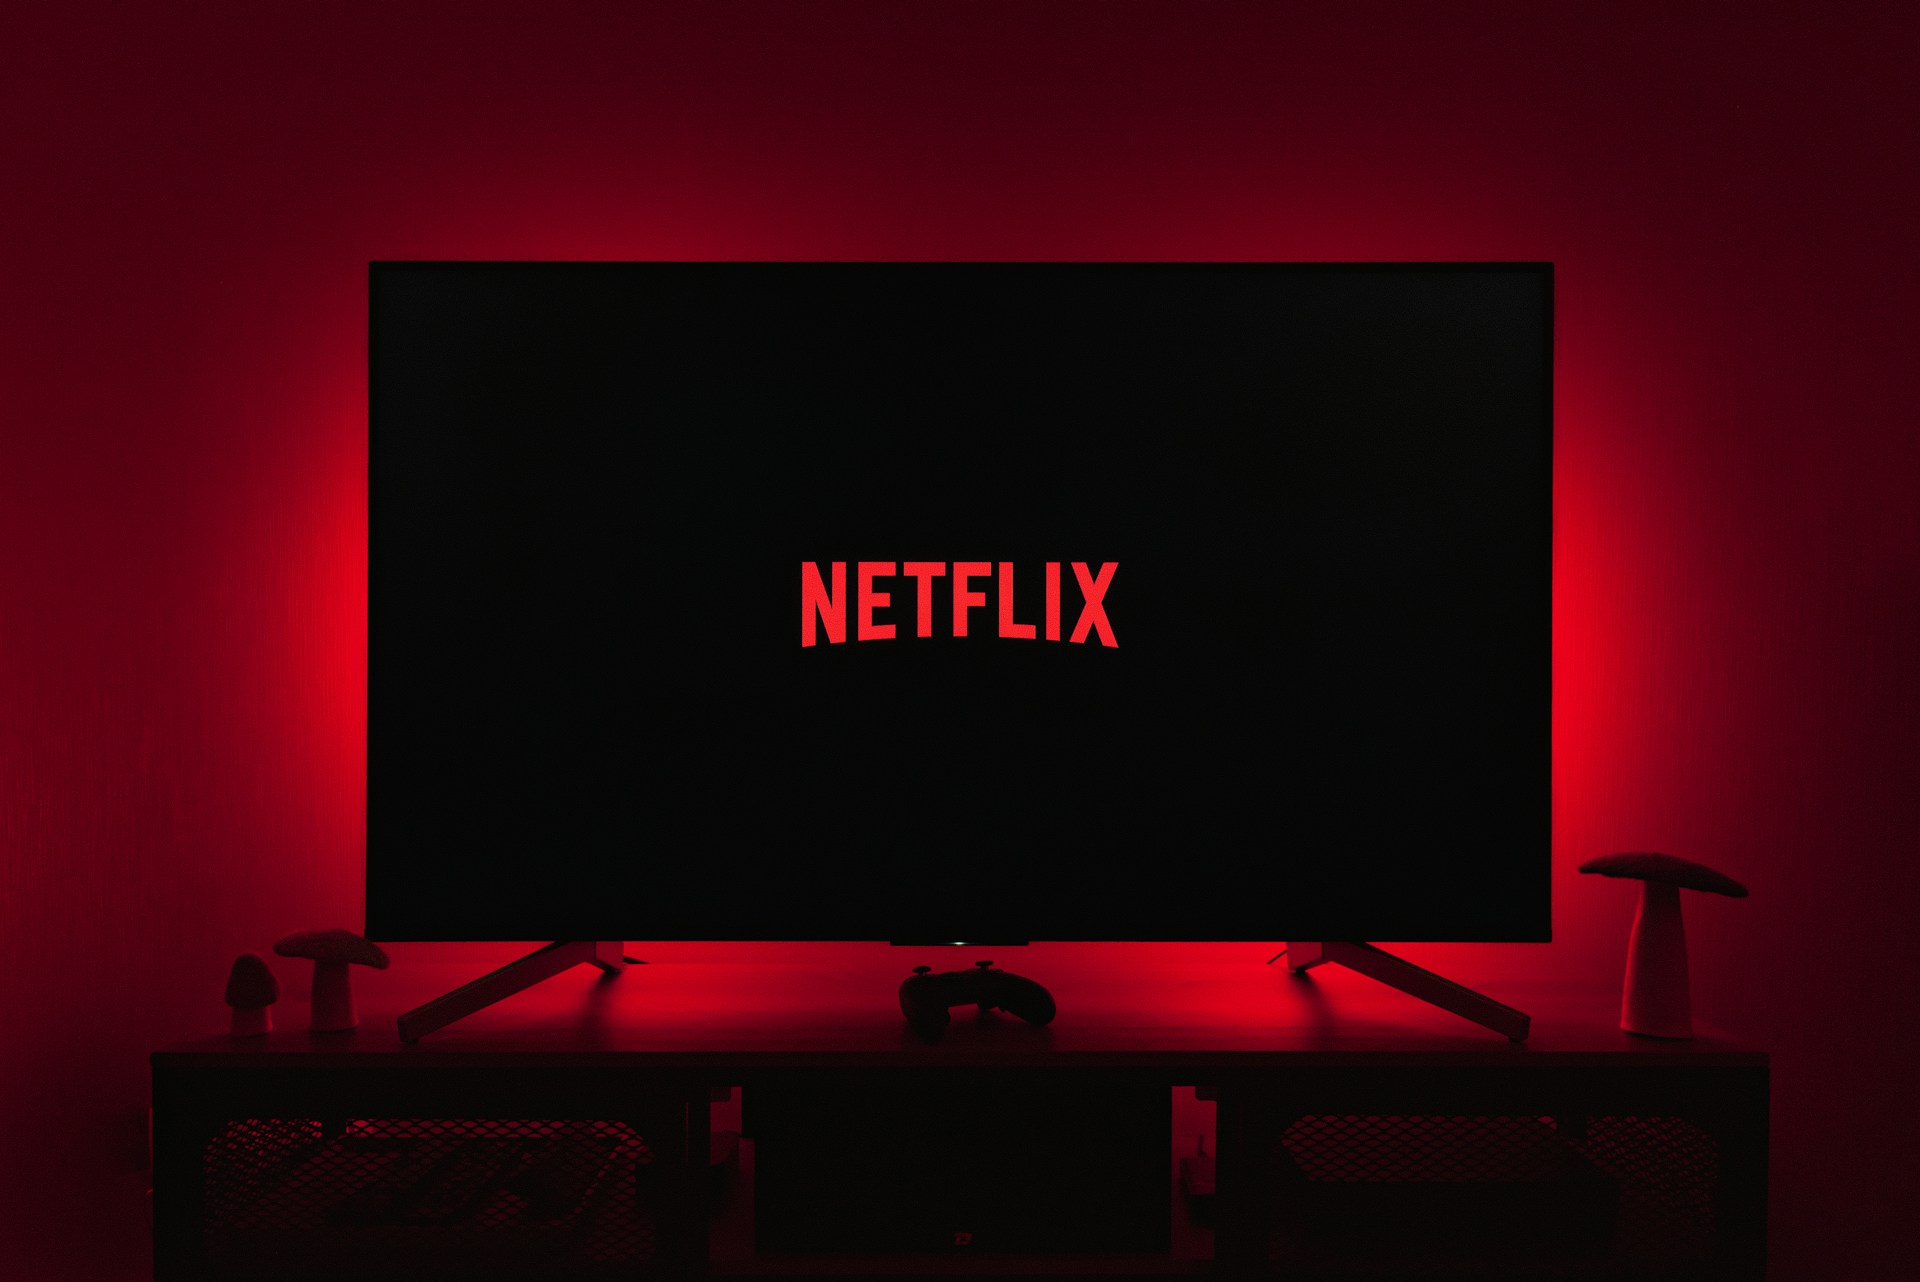

*Image source: [Unsplash – Photo by Thibault Penin](https://unsplash.com/photos/a-television-with-the-netflix-logo-lit-up-in-the-dark-GrzoKN1aqSg)*

---

This project explores the Netflix Movies and TV Shows dataset using Python.  
It includes data cleaning, visual analysis, and key insights related to genres, content types, release trends, ratings, popularity, and more.

**Tools Used:** pandas, seaborn, matplotlib  
**Dataset Source:** [Kaggle – Netflix Movies and TV Shows (CC0 License)](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies)


### 1. Import Libraries

Importing the required libraries for data analysis and visualization.

In [ ]:
# Import all the necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import builtins
import ast

### 2. Reset Overwritten Built-ins

Resetting a few overwritten built-in functions to avoid conflicts with pandas and Python.

In [ ]:
# Make sure standard Python functions (like str, list, type) work normally by resetting them
tr = builtins.str
list = builtins.list
type = builtins.type
sum = builtins.sum
input = builtins.input
print = builtins.print

### 3. Load Raw Datasets

Loading the titles and credits datasets from local files.

In [ ]:
# Read the titles and credits CSV files into pandas DataFrames
titles = pd.read_csv(r'/content/titles.csv')
credits = pd.read_csv(r'/content/credits.csv')

###  **Titles Dataset Cleaning**

Before we start analyzing the Netflix data, we need to make sure the `titles` dataset is clean and consistent. This includes handling missing values, fixing column types, and removing unnecessary columns. Once it's cleaned, we can trust the data for insights.


### 4. Preview the Data

Checking the first few rows to get a quick look at the structure.



In [ ]:
# Load the titles dataset and display the first few rows to get a quick look
df = pd.read_csv(r'/content/titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


### 5. Dataset Info

Checking column types and missing values.

In [ ]:
# Show summary info of the titles dataset to understand its structure and data types
df = pd.read_csv(r'/content/titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

### 6. Drop Rows with Missing Titles

Removing entries with no title, since they’re not usable.

In [ ]:
# Remove any rows where the title is missing, since title is essential
df =df.dropna(subset=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5849 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5849 non-null   int64  
 7   genres                5849 non-null   object 
 8   production_countries  5849 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5446 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(2), o

### 7. List Column Names

Listing all available columns in the dataset.


In [ ]:
# Print all column names to see what data fields are available
print(df.columns.tolist())

['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


### 8. Fill Missing Age Certifications

Replacing missing values in the age_certification column with 'unknown'.

In [ ]:
# Replace missing age certification values with 'unknown' for clarity
df['age_certification'] = df['age_certification'].fillna('unknown')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,unknown,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


### 9. Drop Unused Columns

Removing the 'description' column since it won't be used in this analysis.

In [ ]:
# Drop the 'description' column to simplify the dataset
df = df.drop(columns=['description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   age_certification     5849 non-null   object 
 5   runtime               5849 non-null   int64  
 6   genres                5849 non-null   object 
 7   production_countries  5849 non-null   object 
 8   seasons               2106 non-null   float64
 9   imdb_id               5446 non-null   object 
 10  imdb_score            5368 non-null   float64
 11  imdb_votes            5352 non-null   float64
 12  tmdb_popularity       5759 non-null   float64
 13  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 685.4+ KB


### 10. Clean Seasons Column

Filling missing values in 'seasons' with 0 and converting them to integers.

In [ ]:
# Fill missing 'seasons' values with zero and convert the column to integers
df['seasons'] = df['seasons'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   age_certification     5849 non-null   object 
 5   runtime               5849 non-null   int64  
 6   genres                5849 non-null   object 
 7   production_countries  5849 non-null   object 
 8   seasons               5849 non-null   int64  
 9   imdb_id               5446 non-null   object 
 10  imdb_score            5368 non-null   float64
 11  imdb_votes            5352 non-null   float64
 12  tmdb_popularity       5759 non-null   float64
 13  tmdb_score            5539 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 685.4+ KB


### 11. Handle Missing Numerical Values

Filling missing values in IMDb, TMDB, and vote columns with their median.

In [ ]:
# Fill missing numeric columns with their median values to handle nulls properly
num_columns = ['imdb_score','imdb_votes','tmdb_popularity','tmdb_score']
for col in num_columns:
  median = df[col].median()
  df[col] = df[col].fillna(median)
  df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   age_certification     5849 non-null   object 
 5   runtime               5849 non-null   int64  
 6   genres                5849 non-null   object 
 7   production_countries  5849 non-null   object 
 8   seasons               5849 non-null   int64  
 9   imdb_id               5446 non-null   object 
 10  imdb_score            5849 non-null   float64
 11  imdb_votes            5352 non-null   float64
 12  tmdb_popularity       5759 non-null   float64
 13  tmdb_score            5539 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 685.4+ KB
<class 'pandas.cor

### 12. Fill Missing IMDb IDs

Replacing missing IMDb IDs with 'unknown'.

In [ ]:
# Replace missing IMDb IDs with 'unknown' to keep the column complete
df['imdb_id'] = df['imdb_id'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5849 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5849 non-null   object 
 3   release_year          5849 non-null   int64  
 4   age_certification     5849 non-null   object 
 5   runtime               5849 non-null   int64  
 6   genres                5849 non-null   object 
 7   production_countries  5849 non-null   object 
 8   seasons               5849 non-null   int64  
 9   imdb_id               5849 non-null   object 
 10  imdb_score            5849 non-null   float64
 11  imdb_votes            5849 non-null   float64
 12  tmdb_popularity       5849 non-null   float64
 13  tmdb_score            5849 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 685.4+ KB


###  **Titles Dataset Cleaning Complete**

The `titles` dataset is now fully cleaned and ready for analysis.  
We handled missing values, removed unnecessary columns, and fixed data types where needed.

From here, we’ll start exploring trends, genres, ratings, and other insights using this cleaned dataset.


###  **Credits Dataset Cleaning**

Now we'll clean the `credits` dataset, which contains information about cast and crew for each title.  
This includes converting JSON-style strings into usable Python objects, handling missing values, and preparing the data for merging with the titles dataset.


### 13. Preview the Data  
Checking the first few rows to get a quick look at the structure.


In [ ]:
# Load the credits dataset and display the first few rows to get a quick look
credits = pd.read_csv('/content/credits.csv')
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


### 14. Check Structure and Missing Values  
We’ll check data types, column names, and see if any fields have missing or inconsistent values.

In [ ]:
# Check data types and non-null counts to understand structure and spot missing values
credits.info()

# Count missing values in each column
credits.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


,0
person_id,0
id,0
name,0
character,9772
role,0


### 15. Basic Data Quality Checks  
We’ll preview some unique values and check if there’s anything unusual in the columns before we move forward.


In [ ]:
# Look at a few sample values in each column
print("Unique roles:", credits['role'].unique())
print("Sample names:", credits['name'].unique()[:5])
print("Missing 'character' rows sample:")
print(credits[credits['character'].isna()].head())

Unique roles: ['ACTOR' 'DIRECTOR']
Sample names: ['Robert De Niro' 'Jodie Foster' 'Albert Brooks' 'Harvey Keitel'
 'Cybill Shepherd']
Missing 'character' rows sample:
     person_id        id             name character      role
36        3308   tm84618  Martin Scorsese       NaN  DIRECTOR
59       17727  tm154986     John Boorman       NaN  DIRECTOR
106      11475  tm127384      Terry Jones       NaN  DIRECTOR
107      11473  tm127384    Terry Gilliam       NaN  DIRECTOR
162       1063  tm120801   Robert Aldrich       NaN  DIRECTOR


### 16. Check for Duplicates  
Let’s make sure there are no duplicate rows in the credits dataset before moving forward.

In [ ]:
duplicates = credits.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# If any duplicates exist, display them
if duplicates.sum() > 0:
    display(credits[duplicates])


Number of duplicate rows: 0


###  **Data Cleaning Complete**

Both the `titles` and `credits` datasets are now clean and ready for analysis.

- Missing values were handled carefully.
- Column types and formats were fixed.
- Duplicate entries were removed.
- Cast and crew data in `credits` are well structured and consistent.


###  **Saving Cleaned Files**

To make sure we don’t lose our work and can reuse these cleaned datasets easily,  
let’s save both `titles` and `credits` as new CSV files.  
These files will be the base for merging and further analysis.


### 18. Save Both Cleaned Datasets  
To keep our data organized, let's save both cleaned `titles` and `credits` datasets.  
This makes merging and later analysis easier and reproducible.


In [ ]:
# Save cleaned titles dataset
df.to_csv('/content/titles_cleaned.csv', index=False)

# Save cleaned credits dataset
credits.to_csv('/content/credits_cleaned.csv', index=False)

###  **Starting Titles Data Analysis**

With our data cleaned and saved, we can now dive into exploring the `titles` dataset.  
We’ll look at trends in genres, release years, runtimes, ratings, and popularity to understand what kind of content Netflix offers and how it has evolved over time.


### 19. Preview the Data

Checking the first few rows to get a quick look at the structure.



In [ ]:
# Load the Cleaned titles dataset and display the first few rows to get a quick look
df = pd.read_csv(r'/content/titles_cleaned.csv')
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1,unknown,6.6,2233.5,0.600,6.900
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,unknown,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.600


### 20. Count Content Types

Counting how many entries are movies and how many are shows. Visualizing the number of Movies and TV Shows.

In [ ]:
# Count how many titles are movies vs shows and store the result
type = df['type'].value_counts()

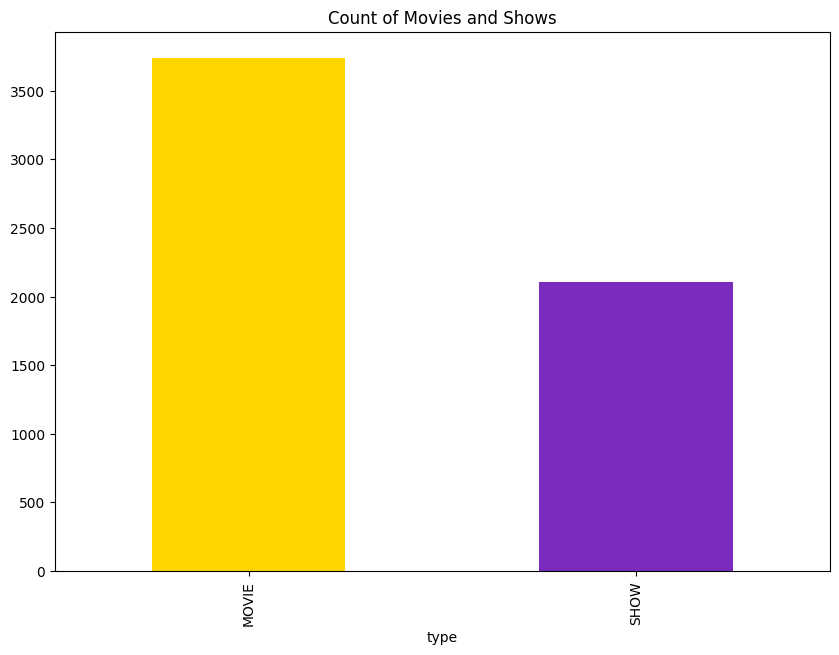

In [ ]:
# Plot a bar chart showing the number of movies versus shows in the dataset
plt.figure(figsize = (10,7))
type.plot.bar( color=['#ffd500', '#7b2cbf'])
plt.title('Count of Movies and Shows')
plt.show()

### 21. Check Genres Format

Checking how many genres are stored. Cleaning the genres column and finding the 10 most frequent genres. Bar chart showing the most common genres on Netflix.

In [ ]:
# Clean and split the genres string to prepare for analysis
print(builtins.type(df['genres'].iloc[0]))
print(df['genres'].head())

<class 'str'>
0                              ['documentation']
1                             ['drama', 'crime']
2    ['drama', 'action', 'thriller', 'european']
3                ['fantasy', 'action', 'comedy']
4                              ['war', 'action']
Name: genres, dtype: object


In [ ]:
# Count how often each genre appears and print the top 10 most common genres
genres_clean_str = df['genres'].str.replace(r"[\[\]']", "", regex=True)
genres_split = genres_clean_str.str.split(',')
genres_exploded = genres_split.explode()
genres_final = genres_exploded.str.strip()
genre_counts = genres_final.value_counts()
print(genre_counts.head(10))

genres
drama            2968
comedy           2325
thriller         1228
action           1157
romance           971
documentation     952
crime             936
animation         705
family            682
fantasy           630
Name: count, dtype: int64


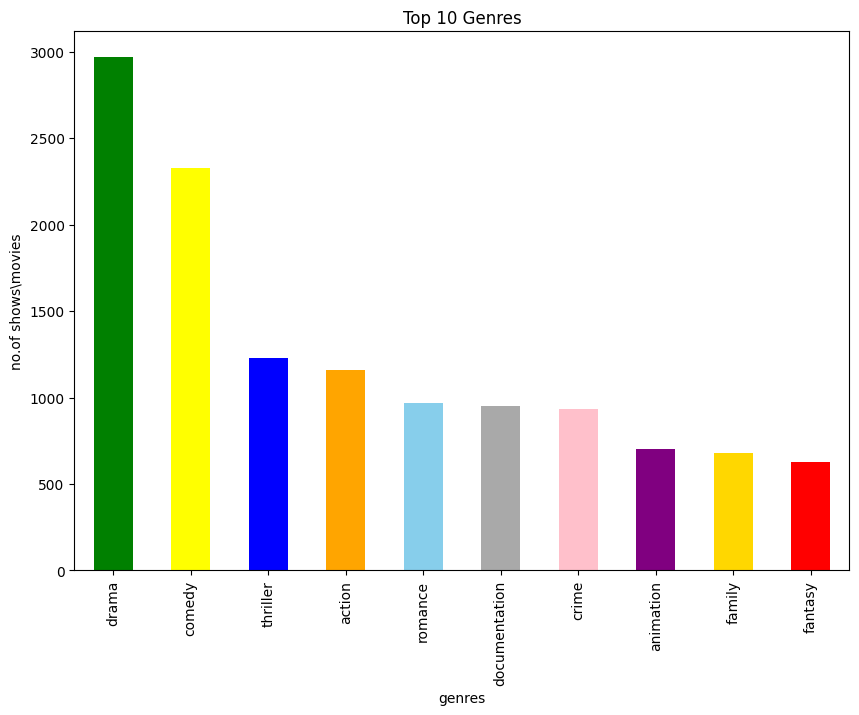

In [ ]:
# Visualize the top 10 genres with a colorful bar chart
plt.figure(figsize = (10,7))
colors = ['green', 'yellow', 'blue', 'orange', 'skyblue', 'darkgrey', 'pink', 'purple', 'gold', 'red']
genre_counts.head(10).plot.bar( color = colors)
plt.title('Top 10 Genres')
plt.ylabel('no.of shows\movies')
plt.show()

### 22. Count Titles Per Year

Counting how many titles were released each year. Line chart showing yearly release trends.

In [ ]:
# Count and sort the number of titles released each year to spot trends
years_count = df['release_year'].value_counts().sort_index()
print(df['release_year'].value_counts().sort_index())

release_year
1945      1
1954      2
1956      1
1958      1
1959      1
       ... 
2018    773
2019    836
2020    814
2021    787
2022    371
Name: count, Length: 63, dtype: int64


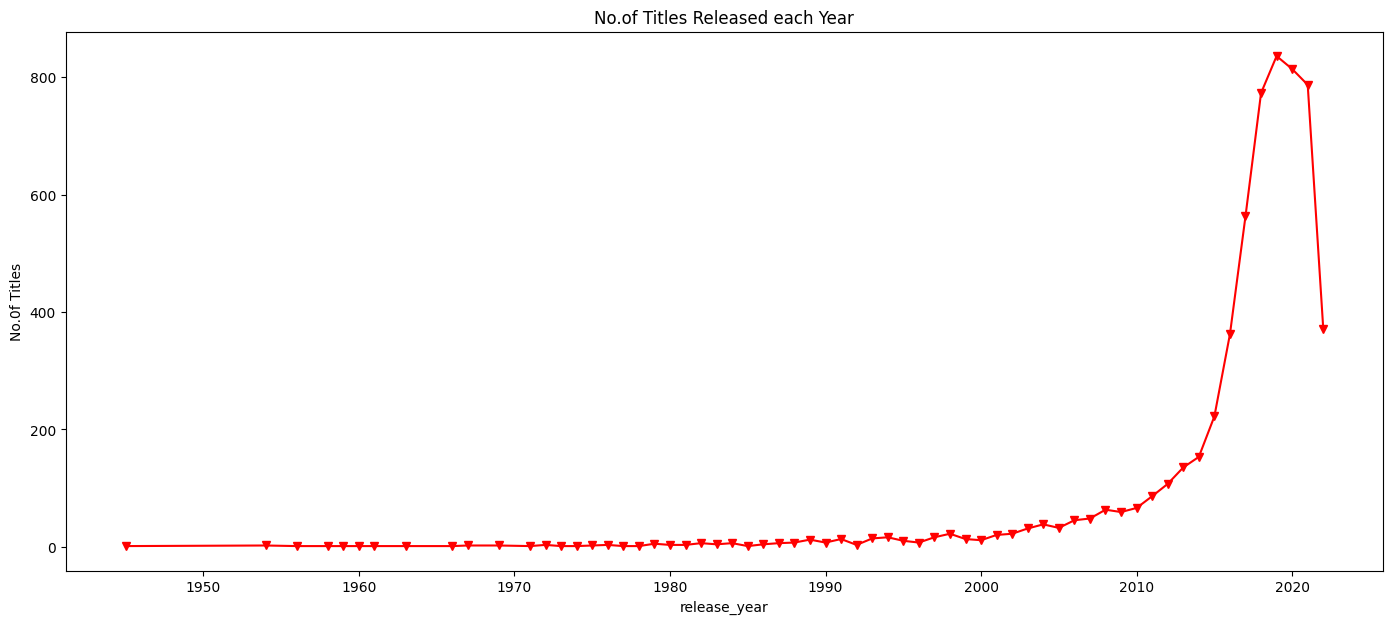

In [ ]:
# Plot a line chart to show how many titles were released each year
plt.figure(figsize=(17,7))
years_count.plot.line(color = 'red', marker = 'v')
plt.title('No.of Titles Released each Year')
plt.ylabel('No.0f Titles')
plt.show()

### 23. Group by Year and Type

Breaking down releases by year and by type (movie or show). Line chart comparing the growth of movies and shows over the years.

In [ ]:
# Group data by release year and type to compare movies vs shows over time
year_type = df.groupby(['release_year','type']).size().unstack().fillna(0)
print(year_type)

type          MOVIE   SHOW
release_year              
1945            0.0    1.0
1954            2.0    0.0
1956            1.0    0.0
1958            1.0    0.0
1959            1.0    0.0
...             ...    ...
2018          473.0  300.0
2019          525.0  311.0
2020          500.0  314.0
2021          473.0  314.0
2022          200.0  171.0

[63 rows x 2 columns]


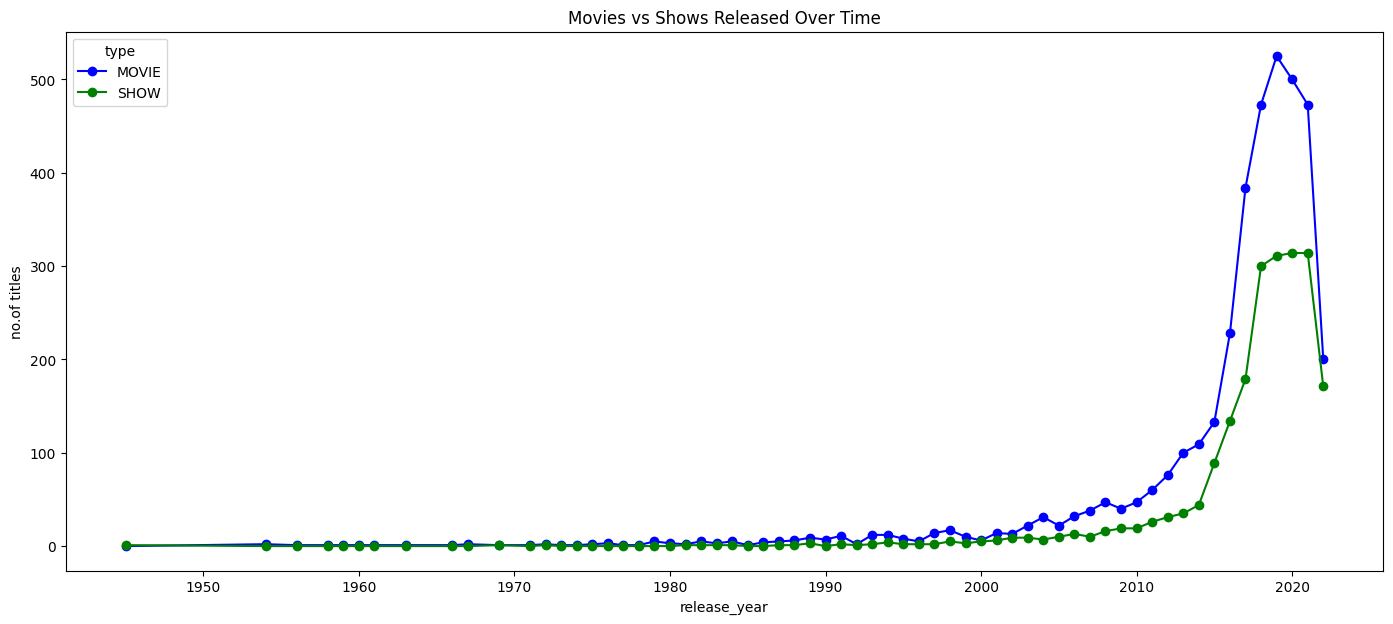

In [ ]:
# Plot the yearly count of movies and shows side by side as a line chart
year_type.plot.line(figsize=(17,7), marker='o', color=['blue', 'green'])
plt.title('Movies vs Shows Released Over Time')
plt.ylabel('no.of titles')
plt.show()

### 24. Runtime Summary - Movies vs Shows

Displaying runtime stats grouped by type. Histogram showing the runtime distribution for both content types.

In [ ]:
# Calculate runtime statistics separately for movies and shows
runtime_stat = df.groupby('type')['runtime'].describe()
print(runtime_stat)

        count       mean        std  min   25%   50%    75%    max
type                                                              
MOVIE  3743.0  98.236976  30.611542  2.0  85.0  98.0  115.0  240.0
SHOW   2106.0  38.978158  17.626354  0.0  25.0  41.0   49.0  190.0


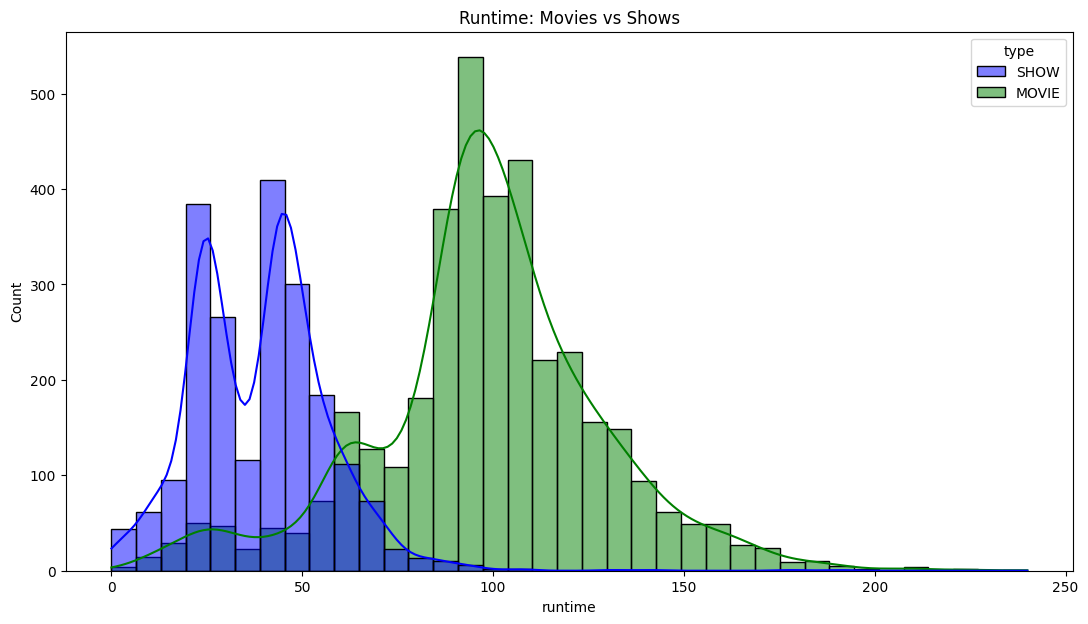

In [ ]:
# Show the distribution of runtimes for movies and shows using histograms
plt.figure(figsize=(13,7))
sns.histplot(data = df, x = 'runtime', hue = 'type', bins = 37, kde = True, palette = ['blue', 'green'])
plt.title('Runtime: Movies vs Shows')
plt.show()

### 25. Age Certifications

Checking the frequency of each age rating. Bar chart showing the distribution of age ratings.

In [ ]:
# Count and print the frequency of each age certification rating
age_cer = (df['age_certification'].value_counts())
print(age_cer)

age_certification
unknown    2618
TV-MA       883
R           556
TV-14       474
PG-13       451
PG          233
TV-PG       188
G           124
TV-Y7       120
TV-Y        107
TV-G         79
NC-17        16
Name: count, dtype: int64


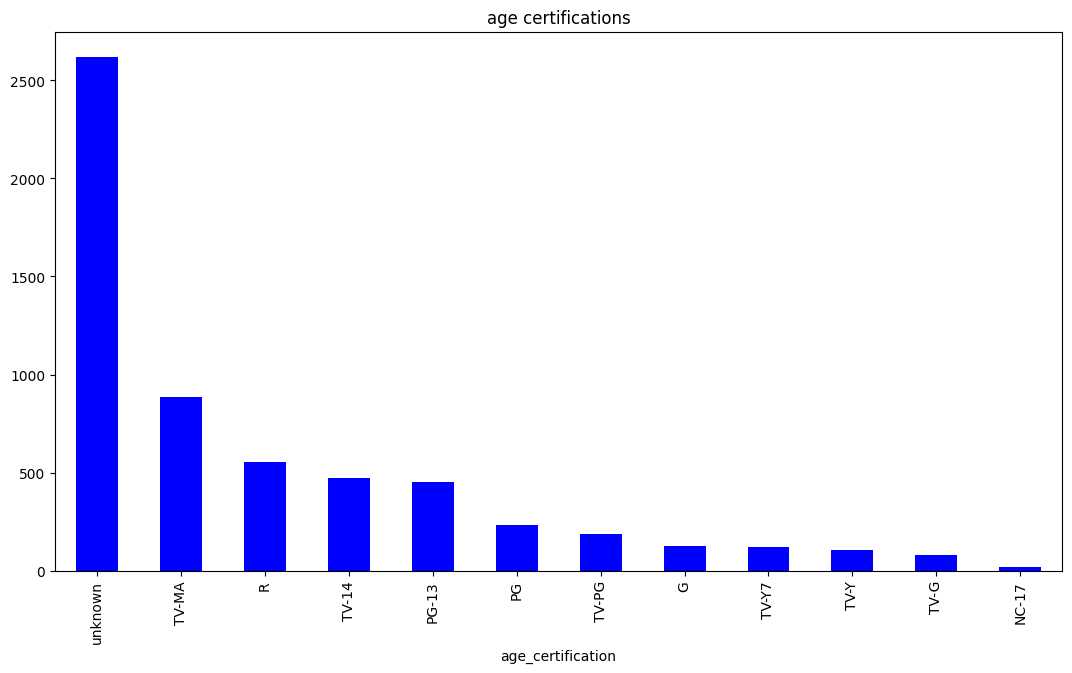

In [ ]:
# Visualize the distribution of age certifications with a bar chart
plt.figure(figsize = (13,7))
age_cer.plot.bar(color = 'blue')
plt.title('age certifications')
plt.show()

### 26. Production Countries

Previewing the raw format of production country info. Cleaning and exploding country names from the original column. Finding the top countries based on number of titles produced. Bar chart showing which countries produce the most Netflix content.

In [ ]:
# Clean and prepare the production countries data for analysis
country_clean = df['production_countries']
print(country_clean)

0             ['US']
1             ['US']
2             ['US']
3             ['GB']
4       ['GB', 'US']
            ...     
5844          ['NG']
5845              []
5846          ['CO']
5847          ['US']
5848              []
Name: production_countries, Length: 5849, dtype: object


In [ ]:
# Split and explode the production countries to count each country separately
df['production_countries'] = df['production_countries'].astype(str)
countries_stripped = df['production_countries'].str.strip('[]').str.replace("'","").str.split(',')
countries_exploded = countries_stripped.explode().str.strip()
countries_clean = countries_exploded[countries_exploded != '']
print(countries_clean.head())

0    US
1    US
2    US
3    GB
4    GB
Name: production_countries, dtype: object


In [ ]:
# Print the top 10 countries by number of productions
country_counts = countries_clean.value_counts()
print(country_counts.head(10))

production_countries
US    2323
IN     622
GB     404
JP     287
FR     248
KR     228
CA     219
ES     211
DE     139
MX     126
Name: count, dtype: int64


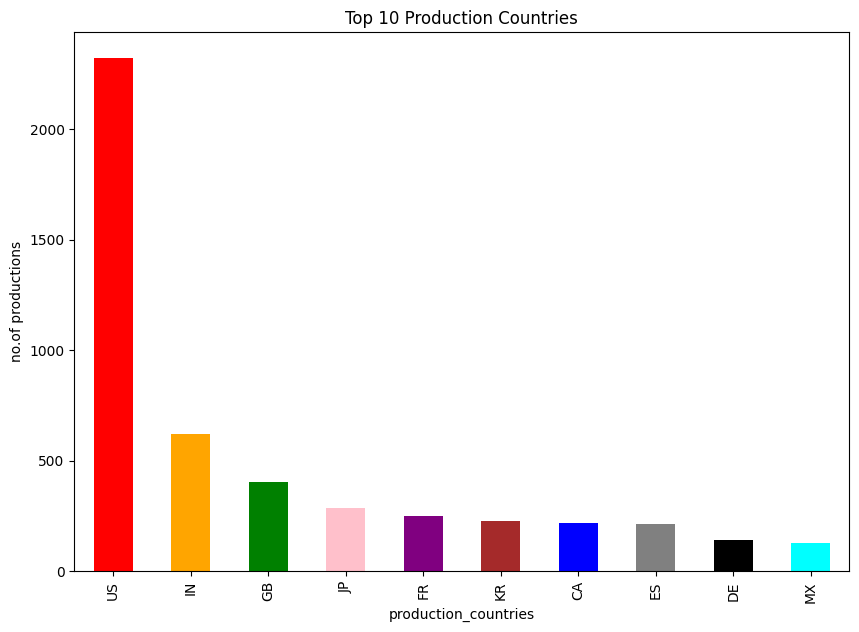

In [ ]:
# Plot a bar chart showing the top 10 production countries
plt.figure(figsize = (10,7))
colors = ['red', 'orange', 'green', 'pink', 'purple','brown', 'blue', 'gray', 'black', 'cyan']
country_counts.head(10).plot.bar(color = colors)
plt.title('Top 10 Production Countries')
plt.ylabel('no.of productions')
plt.show()

### 27. Distribution IMDb Scores

Showing basic stats for IMDb scores across all titles. Dropping missing IMDb scores to prep for visualization. Histogram showing how titles are rated.

In [ ]:
# Describe the statistics of IMDb scores to understand their range and spread
df['imdb_score'].describe()

,imdb_score
count,5849.000000
mean,6.518191
std,1.115206
min,1.500000
25%,5.900000
50%,6.600000
75%,7.300000
max,9.600000


In [ ]:
# Extract IMDb scores and print them, ignoring missing values
imdb_scores = df['imdb_score'].dropna()
print(imdb_scores)

0       6.6
1       8.2
2       7.7
3       8.2
4       7.7
       ... 
5844    6.8
5845    7.7
5846    3.8
5847    6.6
5848    7.8
Name: imdb_score, Length: 5849, dtype: float64


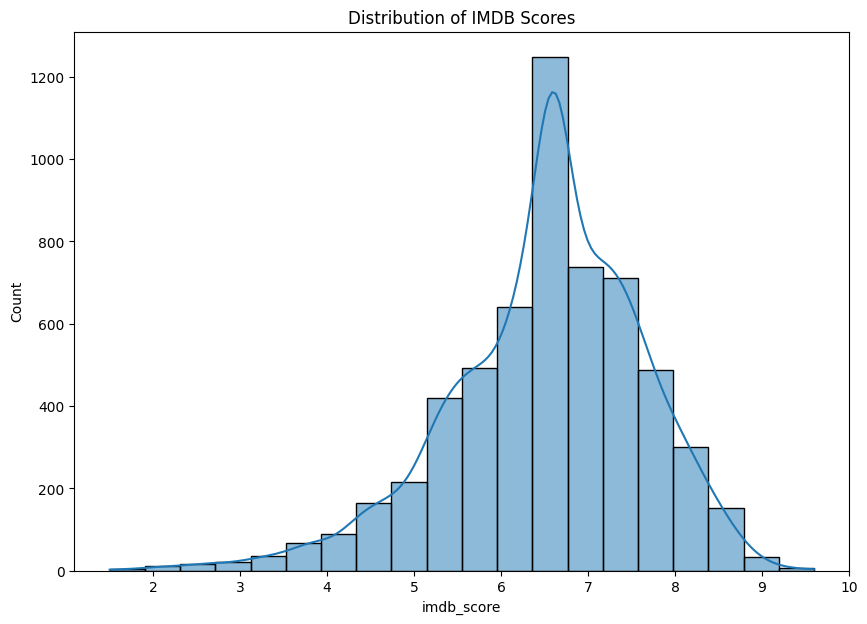

In [ ]:
# Plot the distribution of IMDb scores using a histogram with a density curve
plt.figure(figsize=(10,7))
sns.histplot(imdb_scores,bins = 20, kde = True)
plt.title('Distribution of IMDB Scores')
plt.show()

### 28. Average IMDb Score Over Time
Calculating average IMDb score per release year. Line chart showing rating trends over the years.

In [ ]:
# Calculate average IMDb score for each release year to track rating trends
average_rating = df.groupby('release_year')['imdb_score'].mean()
print(average_rating)

release_year
1945    6.600000
1954    7.450000
1956    6.700000
1958    7.500000
1959    6.600000
          ...   
2018    6.507374
2019    6.526914
2020    6.362654
2021    6.328208
2022    6.232615
Name: imdb_score, Length: 63, dtype: float64


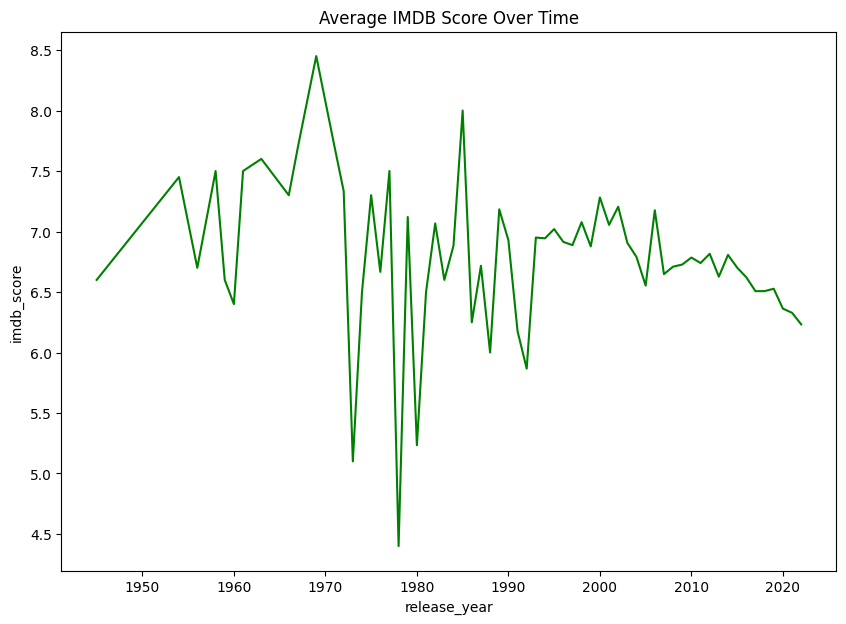

In [ ]:
# Plot the average IMDb score over time as a line chart
plt.figure(figsize = (10,7))
average_rating.plot(color = 'green')
plt.title('Average IMDB Score Over Time')
plt.ylabel('imdb_score')
plt.show()

### 29. Top 10 Most Popular Titles

Listing the top 10 most popular titles based on TMDB popularity. Bar chart showing the most popular Netflix titles by type.

In [ ]:
# List the top 10 titles with the highest TMDB popularity scores
popular = df[['title', 'tmdb_popularity','type']].sort_values(by = 'tmdb_popularity', ascending = False).head(10)
print(popular.head(10))

                     title  tmdb_popularity   type
4706           Incantation         2274.044  MOVIE
1123       Stranger Things         2226.231   SHOW
4701         The Sea Beast         1723.363  MOVIE
4713    Valley of the Dead         1668.296  MOVIE
4695  The Man from Toronto         1439.906  MOVIE
4692         Resident Evil         1387.392   SHOW
5058             Collision         1194.149  MOVIE
833         Peaky Blinders         1038.077   SHOW
4698            Spiderhead          996.869  MOVIE
1136               Lucifer          922.112   SHOW


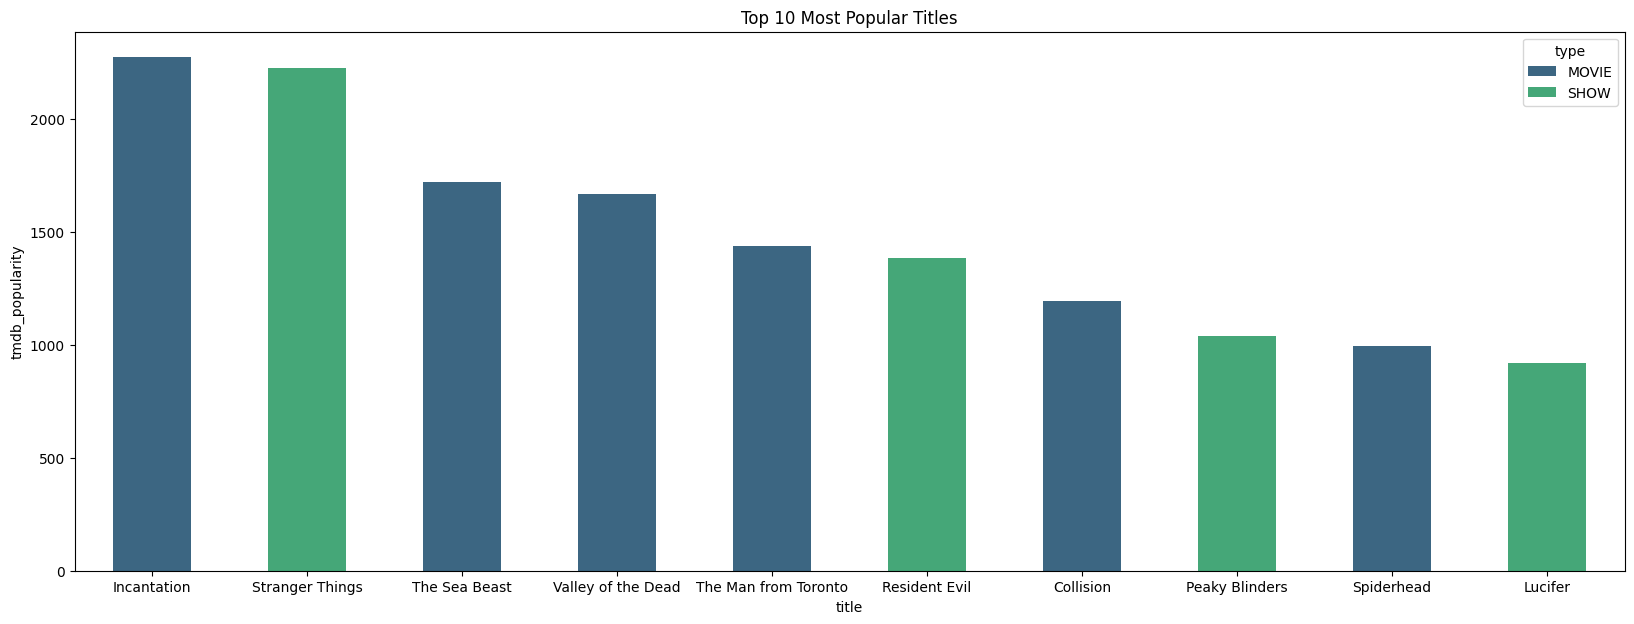

In [ ]:
# Create a bar chart of the top 10 most popular titles by TMDB popularity
plt.figure(figsize = (20,7))
sns.barplot(popular, x = 'title',y = 'tmdb_popularity',hue = 'type', palette = 'viridis', width = 0.5)
plt.title('Top 10 Most Popular Titles')
plt.show()

###  **Titles Analysis Complete**

We’ve explored key insights from the `titles` dataset, including genre popularity, release trends, runtimes, and ratings.  



###  **Titles Analysis Summary**

Here’s what we learned from the `titles` dataset:

- Netflix has more movies than shows overall, but shows have steadily increased over time.
- Drama and Comedy are the dominant genres.
- Content production peaked between 2016 and 2020, highlighting Netflix’s expansion phase.
- Most shows have runtimes under 60 minutes, while movies vary more widely.
- Mature content (TV-MA) is the most common age certification.
- The US and India lead in production, followed by other countries.
- IMDb scores generally fall between 6 and 8 and have remained stable over the years.
- A small group of titles have very high TMDB popularity, often Netflix Originals or major releases.

These insights give a solid overview of Netflix’s content trends and focus areas over time.


### **Starting Credits Data Analysis**

1.   List item
2.   List item



Now that the `credits` dataset is cleaned and saved, we’ll start exploring the people behind Netflix’s content.  
This includes analyzing actors, directors, their roles, and contributions across movies and shows.


### 30. Preview the Data  
Checking the first few rows to get a quick look at the structure.


In [ ]:
df = pd.read_csv('credits_cleaned.csv')
print(df.columns)

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [ ]:
# Load the credits dataset and display the first few rows to get a quick look
df = pd.read_csv('/content/credits_cleaned.csv')
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


### 31. Top Actors and Directors by Number of Credits

Counting the number of credits for actors and directors, then showing the top 10 of each with a bar chart for easy comparison.

In [ ]:
# Count appearances for actors and show top 10
actor_counts = df[df['role'] == 'ACTOR']['name'].value_counts()
print(actor_counts.head(10))

# Count appearances for directors and show top 10
director_counts = df[df['role'] == 'DIRECTOR']['name'].value_counts()
print(director_counts.head(10))

name
Boman Irani              25
Kareena Kapoor Khan      25
Shah Rukh Khan           23
Takahiro Sakurai         21
Paresh Rawal             20
Priyanka Chopra Jonas    20
Amitabh Bachchan         20
Anupam Kher              19
Yuki Kaji                19
Nawazuddin Siddiqui      19
Name: count, dtype: int64
name
Raúl Campos            20
Jan Suter              19
Ryan Polito            17
Jay Karas              15
Marcus Raboy           14
Jay Chapman            12
Cathy Garcia-Molina    12
Youssef Chahine        11
Suhas Kadav             8
Justin G. Dyck          8
Name: count, dtype: int64


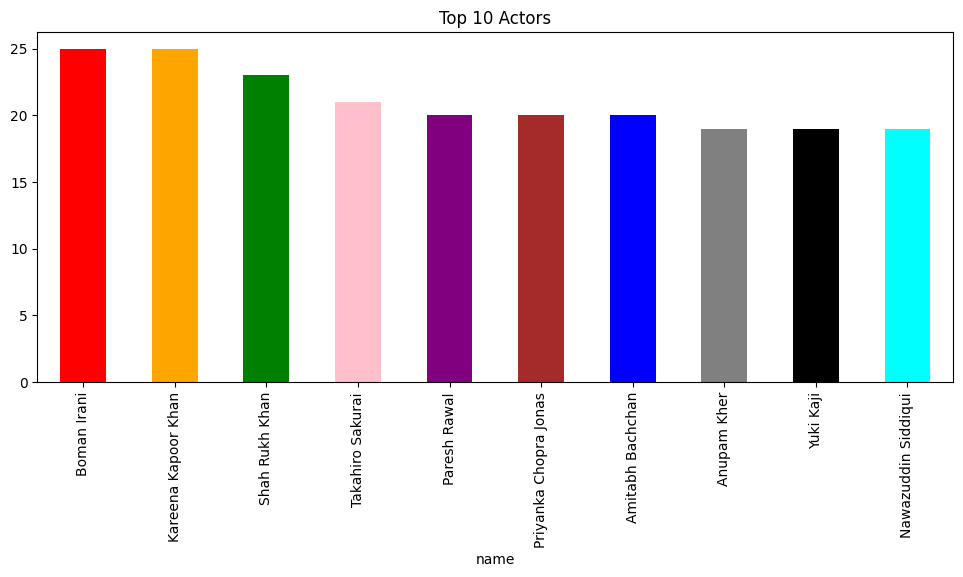

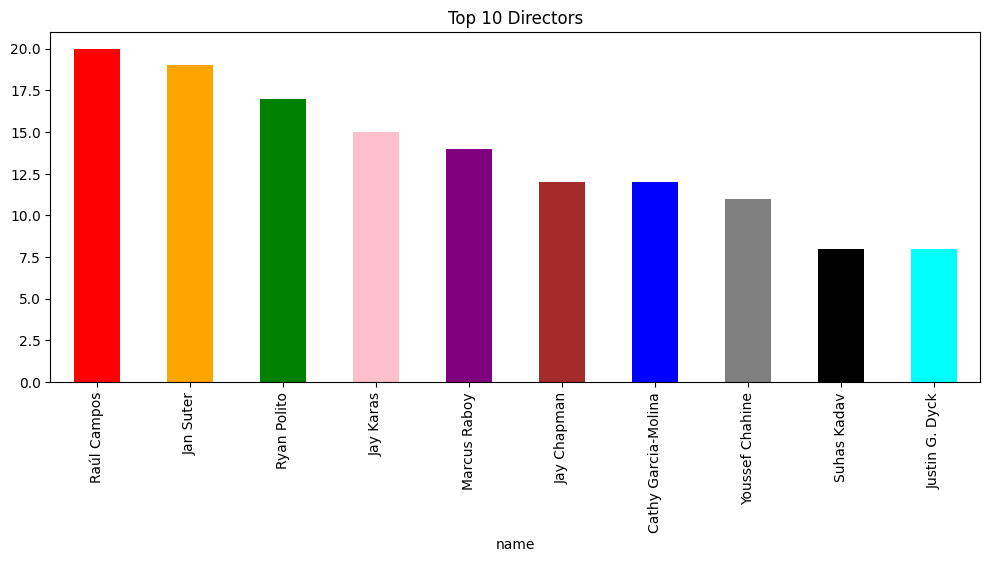

In [ ]:
# Define custom bar colors
colors = ['red', 'orange', 'green', 'pink', 'purple', 'brown', 'blue', 'gray', 'black', 'cyan']

# Plot top 10 actors as a vertical bar chart
plt.figure(figsize = (26,10))
# First subplot in 2x2 grid
plt.subplot(2,2,1)
actor_counts.head(10).plot.bar(color = colors)
plt.title('Top 10 Actors')

# Plot top 10 directors as a vertical bar chart
plt.figure(figsize = (12,10))
# Second subplot in 2x1 grid
plt.subplot(2,1,2)
director_counts.head(10).plot.bar(color = colors)
plt.title('Top 10 Directors')
plt.show()

### 32. Role Distribution in Credits

Counting how many times each role appears in the dataset to understand the overall composition of credited positions.

In [ ]:
# Count and display the number of credits per role
role_counts = df['role'].value_counts()
print(role_counts)

role
ACTOR       73251
DIRECTOR     4550
Name: count, dtype: int64


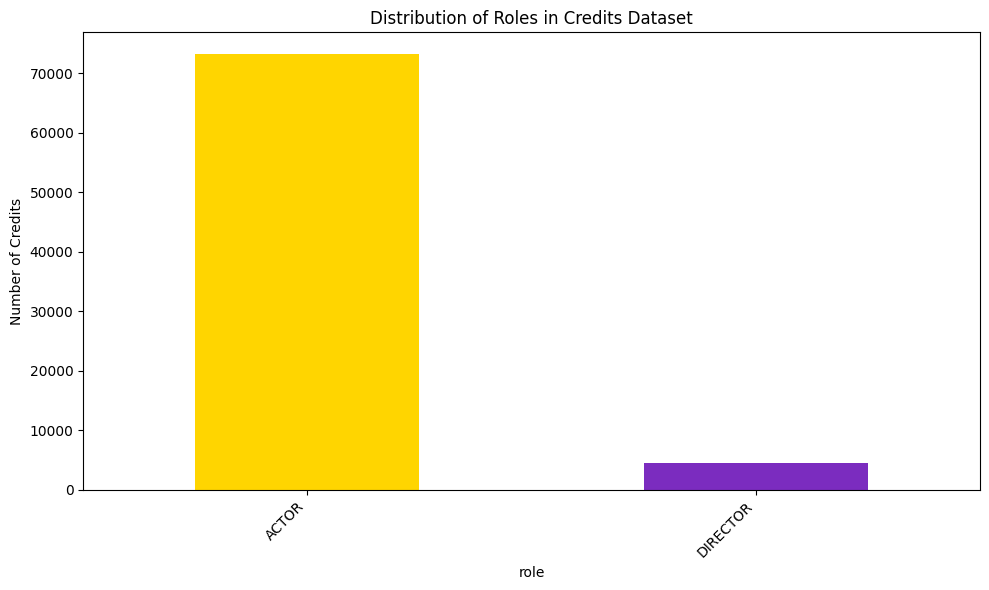

In [ ]:
# Plot role distribution
role_counts.plot(kind='bar', figsize=(10, 6), color=['#ffd500', '#7b2cbf'])
plt.title('Distribution of Roles in Credits Dataset')
plt.ylabel('Number of Credits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 33. Individuals with Multiple Roles on the Same Title

Identifying people who contributed to a title in more than one role (for example, someone who acted and directed in the same project). This highlights multi-talented individuals often seen in creative or low-budget productions.

In [ ]:
# Group by person and title, count how many unique roles they had
multi_roles = df.groupby(['name', 'id'])['role'].nunique().reset_index()

# Filter for those with more than one role on the same title
multi_roles = multi_roles[multi_roles['role'] > 1]

# Count how many times each person did this
multi_role_counts = multi_roles['name'].value_counts().head(10)
print(multi_role_counts)

name
Jeff Tremaine         5
Yılmaz Erdoğan        4
Robb Wells            3
Cem Yılmaz            3
Mike Smith            3
John Paul Tremblay    3
Youssef Chahine       2
Vir Das               2
Aziz Ansari           2
Bo Burnham            2
Name: count, dtype: int64


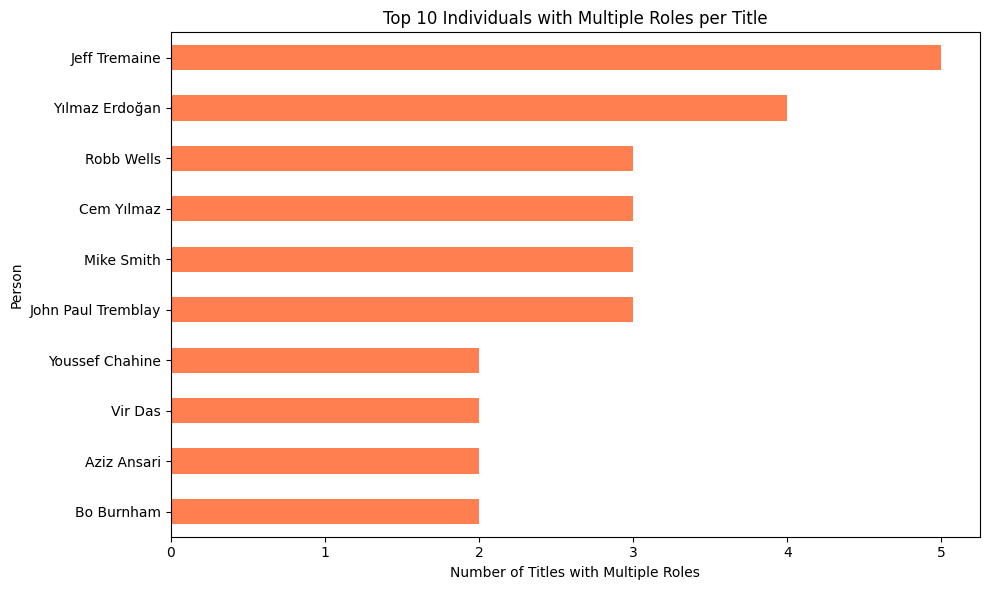

In [ ]:
# Plot top 10 individuals with the most multi-role appearances
multi_role_counts.plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Top 10 Individuals with Multiple Roles per Title')
plt.xlabel('Number of Titles with Multiple Roles')
plt.ylabel('Person')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Credits Analysis Complete**  
We explored three key aspects of the credits dataset to understand who contributes to Netflix content and in what ways.


### **Credits Analysis Summary**  
Here’s what we found:

- The top actors and directors account for a large share of credits, showing a core group driving much of Netflix’s content.  
- Most credited roles fall under actors and directors, reflecting their central creative roles.  
- Some individuals take on multiple roles in the same title, highlighting versatile talent especially in creative or smaller projects.

These insights provide a focused look at the human side of Netflix productions and set the stage for deeper analysis in future work.


### **Merging Titles and Credits Data for Deeper Analysis**

By combining the cleaned credits data with the titles dataset, we create a powerful, unified view of Netflix content and the creative talents behind it. This merged dataset lets us connect people—actors, directors, and more—with the details of the movies and shows they worked on, such as genre, release year, and ratings. With this, we can explore collaborations, role patterns, and quality trends in much richer detail.

In [ ]:
# Load both datasets
titles = pd.read_csv('/content/titles_cleaned.csv')
credits = pd.read_csv('/content/credits_cleaned.csv')

# Merge on the common column (usually 'id' or 'title_id')
df = pd.merge(credits, titles, on='id', how='left')

# Check merged dataframe
print(df.head())
print(df.columns)

   person_id       id             name                character   role  \
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR   
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR   
2       7064  tm84618    Albert Brooks                      Tom  ACTOR   
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR   
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR   

         title   type  release_year age_certification  runtime  \
0  Taxi Driver  MOVIE        1976.0                 R    114.0   
1  Taxi Driver  MOVIE        1976.0                 R    114.0   
2  Taxi Driver  MOVIE        1976.0                 R    114.0   
3  Taxi Driver  MOVIE        1976.0                 R    114.0   
4  Taxi Driver  MOVIE        1976.0                 R    114.0   

               genres production_countries  seasons    imdb_id  imdb_score  \
0  ['drama', 'crime']               ['US']      0.0  tt0075314         8.2   
1 

### 35. Frequent Actor–Director Collaborations

We’ll identify which actor-director pairs worked together the most, using both credits and title info to get a richer understanding of collaborations behind popular Netflix content.

In [ ]:
# Merge actors and directors on the same title id
df = pd.merge(actors, directors, on='id', suffixes=('_actor', '_director'))

# Count how many times each actor-director pair collaborated
pair_counts = df.groupby(['name_actor', 'name_director']).size().reset_index(name='count')

# Get the top 10 most frequent actor-director pairs
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(10)
print(top_pairs)

                name_actor        name_director  count
30137        Joross Gamboa  Cathy Garcia-Molina      7
60009      Takayuki Suzuki        Shigeaki Kubo      5
27179        Jeff Tremaine        Jeff Tremaine      5
45496  Nawazuddin Siddiqui       Anurag Kashyap      5
29585     Johnny Knoxville        Jeff Tremaine      5
30201       Joseph Cannata       Justin G. Dyck      5
29413   John Paul Tremblay     Mike Clattenburg      5
59963     Takahiro Sakurai     Hiroyuki Seshita      5
58251          Spike Jonze        Jeff Tremaine      5
39019        Mamoru Miyano     Hiroyuki Seshita      5


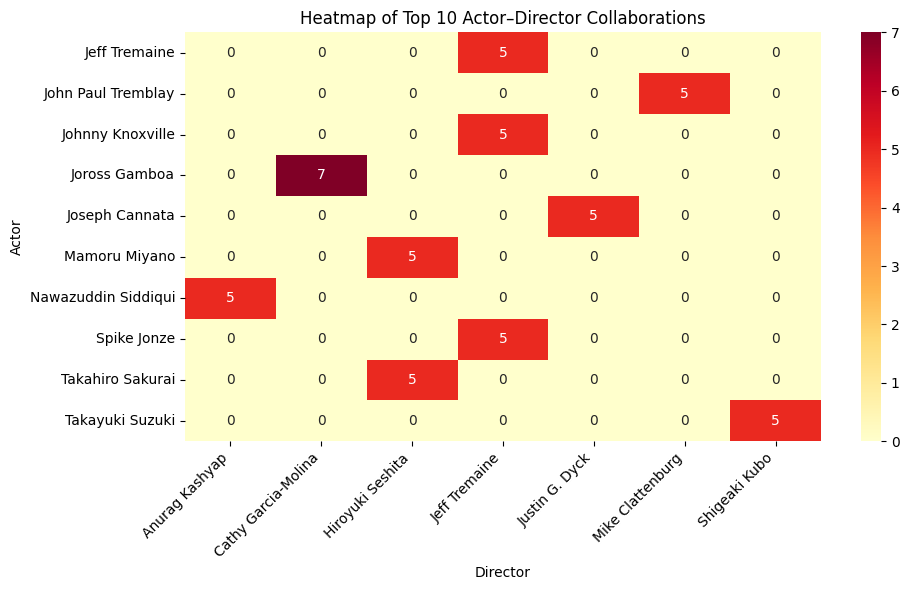

In [ ]:
# Pivot top_pairs for heatmap (only top 10 pairs)
heatmap_data = top_pairs.pivot(index='name_actor', columns='name_director', values='count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', cbar=True)
plt.title('Heatmap of Top 10 Actor–Director Collaborations')
plt.xlabel('Director')
plt.ylabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 36. Most Common Characters Played by Actors

Let’s look at the most frequently occurring character names across all titles. This helps spot popular or reused character roles in Netflix content.

In [ ]:
# Filter only actor rows from the main dataset
actors_data = df[df['role'] == 'ACTOR'].copy()

# Count top 10 most common character names
character_counts = actors_data['character'].value_counts().head(10)
print(character_counts)

character
Narrator                3
Himself                 3
Sahir Khan's Heroine    2
Roma                    2
Herself (uncredited)    2
Judeau                  2
Meliodas (voice)        2
Griffith                2
Herself                 2
Metphies (voice)        2
Name: count, dtype: int64


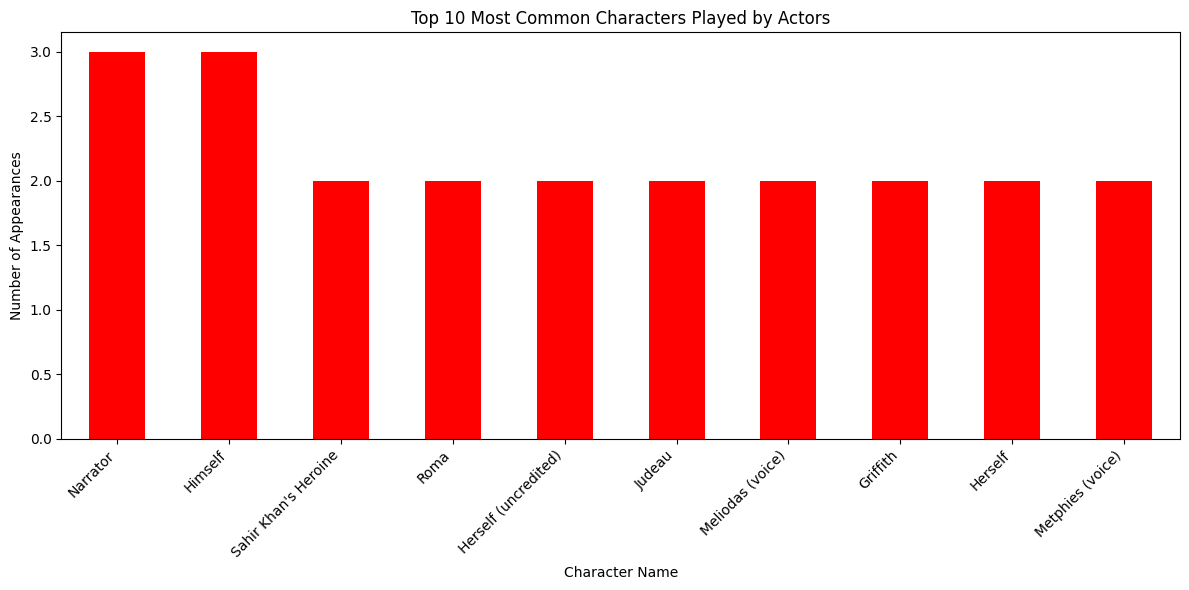

In [ ]:
# Bar chart for top 10 most common characters
plt.figure(figsize=(12, 6))
character_counts.plot.bar(color='red')
plt.title('Top 10 Most Common Characters Played by Actors')
plt.xlabel('Character Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 37. Distribution of Roles Across Content Types

Exploring how various roles like actors, directors, and others are distributed across Movies and Shows. This helps us see which roles are more common in each content type.

In [ ]:
# Merge credits and titles on 'id' to get content type in df
df = pd.merge(credits, titles[['id', 'type']], on='id', how='left')

# Group by content type and role, count occurrences
role_distribution = df.groupby(['type', 'role']).size().unstack(fill_value=0)

print(role_distribution)

role   ACTOR  DIRECTOR
type                  
MOVIE  59220      3870
SHOW   14031       679


<Figure size 700x600 with 0 Axes>

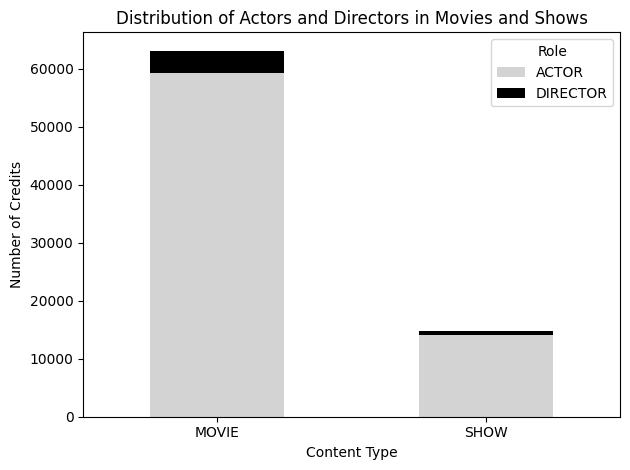

In [ ]:
# Stacked bar chart showing counts of actors and directors by content type (Movies vs Shows)
plt.figure(figsize=(7, 6))
role_distribution.plot(kind='bar', stacked=True, color=['lightgrey', 'black'])
plt.title('Distribution of Actors and Directors in Movies and Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Credits')
plt.xticks(rotation=0)
plt.legend(title='Role')
plt.tight_layout()
plt.show()

### 38. Top Production Countries by Number of Credits

Counting which countries have the most credited people (actors, directors, etc.) involved in Netflix titles. This helps identify major production hubs.

In [ ]:
# Fill NaN with empty string
df['production_countries'] = df['production_countries'].fillna('')

# Remove brackets and quotes, then split and explode
df['production_countries'] = df['production_countries'].str.replace(r"[\[\]'\"]", '', regex=True)
df_countries = df.assign(production_country=df['production_countries'].str.split(',')).explode('production_country')

# Strip whitespace from country codes
df_countries['production_country'] = df_countries['production_country'].str.strip()

# Count top 10 production countries
top_countries = df_countries['production_country'].value_counts().head(10)
print(top_countries)

production_country
US    37736
IN     7562
GB     7106
JP     3802
FR     3641
CA     3547
KR     3042
ES     2919
DE     2396
CN     1476
Name: count, dtype: int64


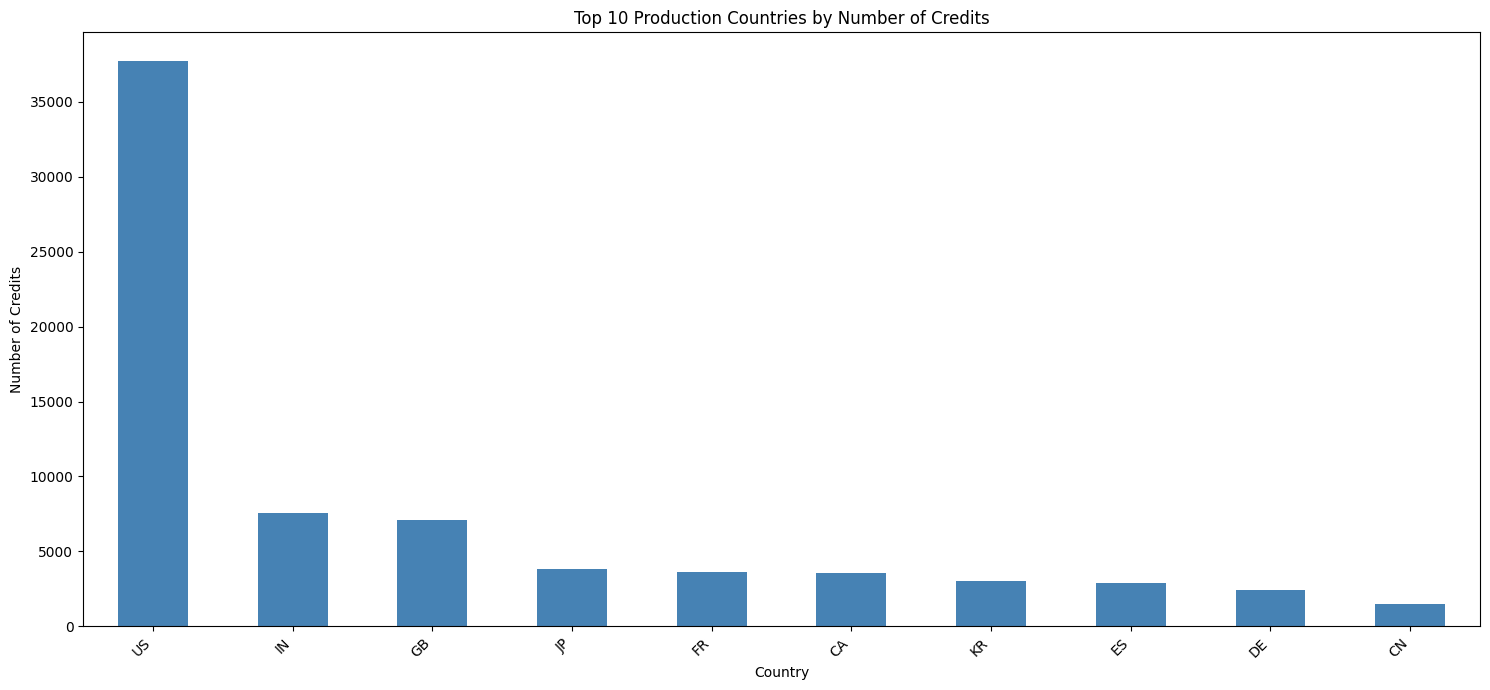

In [ ]:
# Bar chart showing the top 10 production countries by number of credits
plt.figure(figsize=(15, 7))
top_countries.plot(kind='bar', color='steelblue',)
plt.title('Top 10 Production Countries by Number of Credits')
plt.xlabel('Country')
plt.ylabel('Number of Credits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 39. Average Number of Credits per Title by Content Type

Let’s check how many people (actors, directors, etc.) on average are credited per movie and per show. This helps understand the scale of production.

In [ ]:
# Count number of credits per title id
credits_per_title = df.groupby('id').size().reset_index(name='credits_count')

# Merge with titles to get content type
credits_type = pd.merge(credits_per_title, titles[['id', 'type']], on='id', how='left')

# Calculate average credits by type
avg_credits = credits_type.groupby('type')['credits_count'].mean()
print(avg_credits)

type
MOVIE    17.294408
SHOW      7.994565
Name: credits_count, dtype: float64


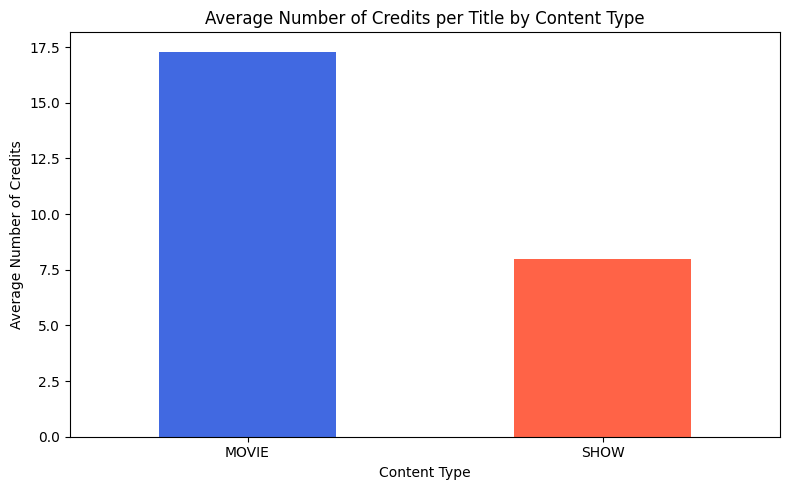

In [ ]:
# Bar chart showing average number of credits per title for movies vs shows
avg_credits.plot(kind='bar', color=['royalblue', 'tomato'], figsize=(8,5))
plt.title('Average Number of Credits per Title by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Number of Credits')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 40. Number of Unique Titles Released Each Year

We’ll use df merged with titles to get release years and count how many unique titles came out each year.

In [ ]:
# Check if 'release_year' is already in df
if 'release_year' not in df.columns:
    df = pd.merge(df, titles[['id', 'release_year']], on='id', how='left')

# Now drop duplicates and count unique titles per year
unique_titles_per_year = df[['id', 'release_year']].drop_duplicates()
titles_per_year = unique_titles_per_year['release_year'].value_counts().sort_index()

print(titles_per_year)

release_year
1954.0      2
1956.0      1
1958.0      1
1959.0      1
1960.0      1
         ... 
2018.0    718
2019.0    780
2020.0    752
2021.0    727
2022.0    351
Name: count, Length: 62, dtype: int64


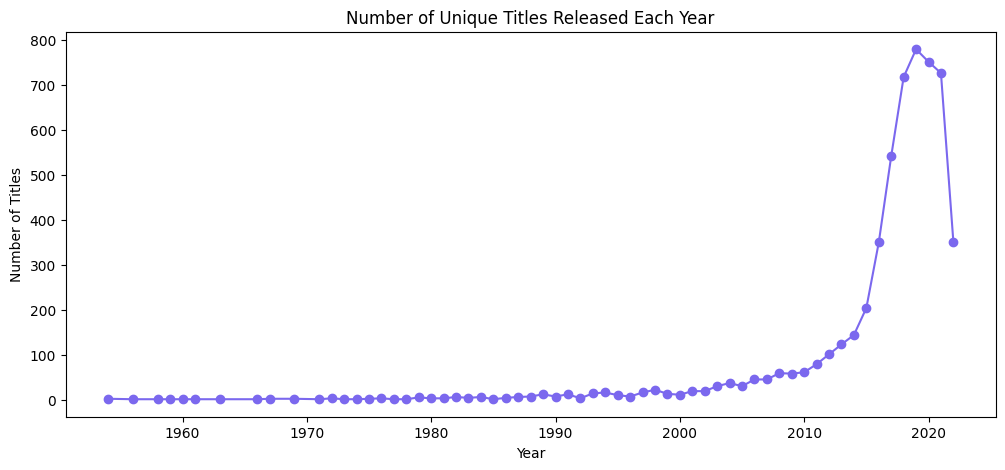

In [ ]:
# Line chart showing number of unique titles released per year over time
plt.figure(figsize=(12,5))
titles_per_year.plot(kind='line', marker='o', color='mediumslateblue')
plt.title('Number of Unique Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

### 42. Impact of Frequent Actor–Director Collaborations on IMDb Scores

We’ll take your actor-director pairs, merge with the titles dataset to get IMDb scores of their joint projects, then calculate average IMDb rating per pair.

In [ ]:
# having 'actors' and 'directors' DataFrames filtered from credits:
df = pd.merge(actors, directors, on='id', suffixes=('_actor', '_director'))

# Merge df with IMDb scores from titles
df = pd.merge(df, titles[['id', 'imdb_score']], on='id', how='left')

# Drop rows missing IMDb scores
df = df.dropna(subset=['imdb_score'])

# Group by actor and director, count collaborations and average IMDb score
pair_stats = df.groupby(['name_actor', 'name_director']).agg(
    collaborations=('id', 'count'),
    avg_score=('imdb_score', 'mean')
).reset_index()

# Filter pairs with at least 3 collaborations, get top 10 by avg score
top_pairs = pair_stats[pair_stats['collaborations'] >= 3].sort_values('avg_score', ascending=False).head(10)

print(top_pairs)

              name_actor      name_director  collaborations  avg_score
48           Boman Irani    Rajkumar Hirani               3   8.066667
84   Nawazuddin Siddiqui     Anurag Kashyap               5   7.760000
157     Takahiro Sakurai  Toshiyuki Kubooka               3   7.666667
164            Yuki Kaji  Toshiyuki Kubooka               3   7.666667
43           Boman Irani      Farhan Akhtar               3   7.300000
146       Shah Rukh Khan        Karan Johar               4   6.900000
9       Amitabh Bachchan        Karan Johar               3   6.666667
154     Takahiro Sakurai   Hiroyuki Seshita               5   6.200000
156     Takahiro Sakurai      Kobun Shizuno               3   5.600000
158            Yuki Kaji   Hiroyuki Seshita               3   5.600000


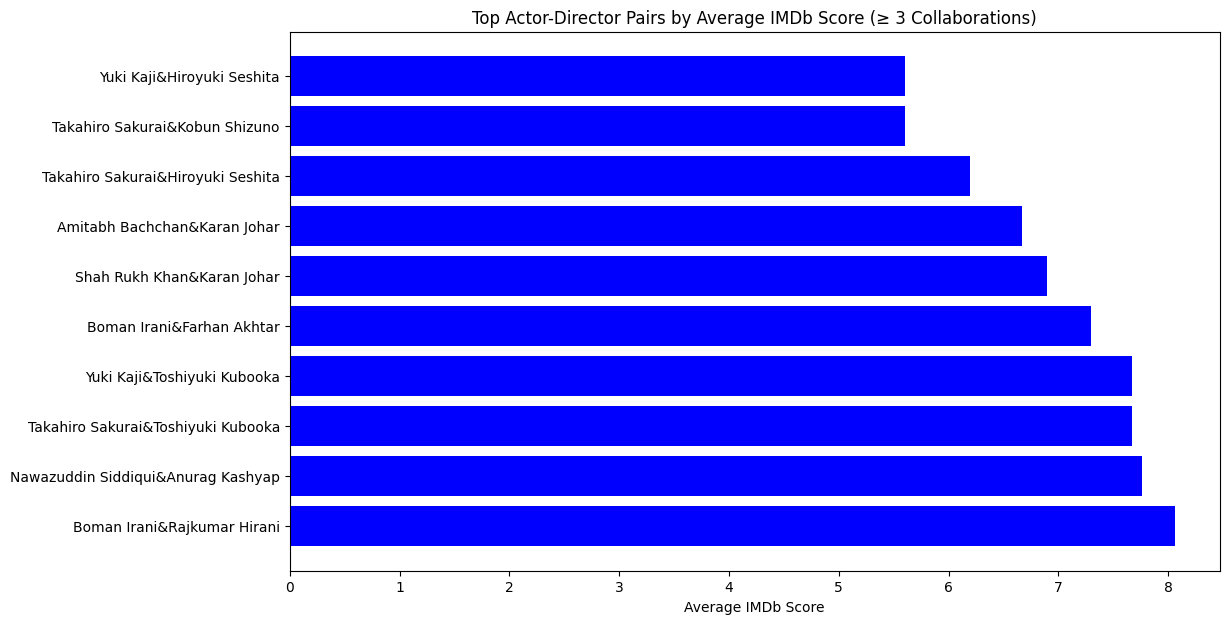

In [ ]:
# Horizontal bar chart showing average IMDb scores of top actor-director pairs
plt.figure(figsize=(12, 7))
bars = plt.barh(top_pairs['name_actor'] + '&' + top_pairs['name_director'],
    top_pairs['avg_score'],
    color= 'blue')
plt.xlabel('Average IMDb Score')
plt.title('Top Actor-Director Pairs by Average IMDb Score (≥ 3 Collaborations)')
plt.show()

### **Merged Analysis Complete**

We combined the credits and titles datasets to gain deeper insights into the people behind Netflix content and to understand how their collaborations relate to popularity and production trends.


### **Merged Analysis Summary**

Here’s what we found:

- **Frequent actor-director pairs** drive much of Netflix’s content and are often linked to higher IMDb ratings.  
- **Recurring characters** appear across multiple titles, reflecting popular or iconic roles.  
- **Role distribution** varies between movies and shows, highlighting production differences.  
- **Geographic focus:** The US, India, and the UK dominate production credits, showing where Netflix concentrates its content creation.  
- **Credit counts:** Movies generally credit more people than shows, underscoring scale differences.  
- **Content growth:** Unique title releases per year illustrate Netflix’s expansion over time.  
- **Collaboration impact:** Strong actor-director partnerships positively influence IMDb scores, reinforcing the value of creative collaborations.  

These combined insights provide a richer understanding of Netflix’s entertainment ecosystem, showing how collaboration, geography, and content type influence success.


### **Final Project Summary**

This project analyzed Netflix’s **titles** and **credits** datasets to uncover insights about the content, creators, and their collaborations.  

We started by exploring the **titles data**, learning about **genre popularity, release trends, runtimes, and ratings**. This showed how Netflix’s content evolved over time and highlighted **dominant genres and production hubs**.  

Next, the **credits data** revealed the **core group of actors and directors** driving much of the content, along with the **roles distribution** and **multi-talented contributors** who take on multiple roles in the same project.  

Finally, merging the datasets allowed us to dig deeper into **actor-director collaborations, character popularity, role distribution across content types, and production geography**. We also observed that **strong creative partnerships correlate with higher IMDb scores**.  

Together, these analyses paint a **comprehensive picture of Netflix’s content ecosystem**—where it comes from, who creates it, and what makes it successful. This project demonstrates the **value of combining multiple datasets to tell a richer story** and provides a **strong foundation for further exploration or recommendations**.
